In this project we will be using California housing prices dataset. We will be predicting value of houses, by taking other attributes as input. 

Link for the dataset https://www.kaggle.com/datasets/camnugent/california-housing-prices
    
This is a regression problem, we will be using root mean square error as performance measure. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
housing = pd.read_csv("california_housing.csv")
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

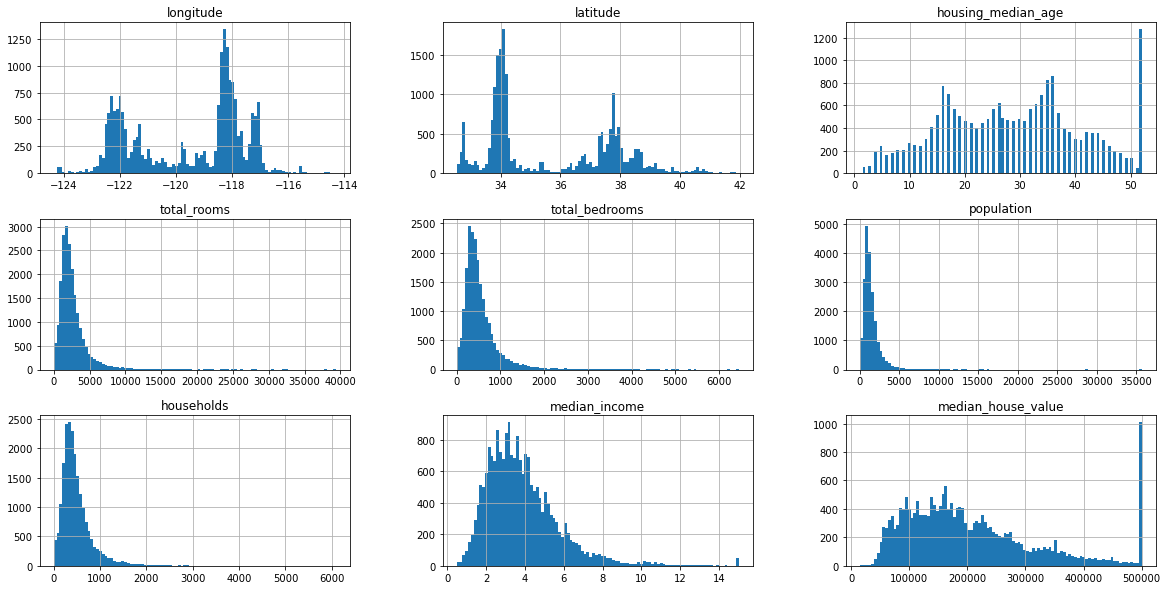

In [6]:
housing.hist(bins=100, figsize=(20,10))
plt.show()

By taking a quick look at the data, we can see that, ocean_proximity is a categorical attribute with string values, total_bedrooms has missing values, and we can see from graphs that the scale of the attribute is different for each other, so we will have to scale them before feeding them to the models, and also the data is skewed, we will also have total_bedrooms take care of it. 

# Creating test set

Take a look at the median_income histogram, most of the data is centered in the range of 0 to 7, but some of the values are present even beyond 10. Now, since income is a important factor in deciding which house to buy, we must make sure that both test set and training set has equal distribution of median_income. To do this we will be using StratifiedShuffleSplit. 

In [7]:
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0., 1.5, 3.0, 4.5, 6.,7.5, np.inf], labels=[1, 2, 3, 4, 5,6])

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.iloc[train_index]
    strat_test_set = housing.iloc[test_index]
    
strat_test_set.drop("income_cat", axis=1, inplace=True)
strat_train_set.drop("income_cat", axis=1, inplace=True)

C:\Users\Ankit\AppData\Local\Temp\ipykernel_14620\3036143847.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strat_test_set.drop("income_cat", axis=1, inplace=True)
C:\Users\Ankit\AppData\Local\Temp\ipykernel_14620\3036143847.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strat_train_set.drop("income_cat", axis=1, inplace=True)


# Exploring data

In [9]:
housing = strat_train_set.copy()

In [10]:
# calculating correlation matrix
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.685600
total_rooms           0.135386
housing_median_age    0.111570
households            0.066012
total_bedrooms        0.048975
population           -0.024114
longitude            -0.045270
latitude             -0.144204
Name: median_house_value, dtype: float64

As we can see that median_house_value has positive correlation with median_income, we can try to make new attributes, which we will have a stronger correlation with median_house_value. The main things which affect the price of a house are the number of rooms in house, and number of bedrooms. We should try to make these attributes, and observe their correlation with median_house_value. 

In [11]:
housing["rooms_house"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_house"] = housing["total_bedrooms"]/housing["total_rooms"]

corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.685600
rooms_house           0.144217
total_rooms           0.135386
housing_median_age    0.111570
households            0.066012
total_bedrooms        0.048975
population           -0.024114
longitude            -0.045270
latitude             -0.144204
bedrooms_house       -0.258208
Name: median_house_value, dtype: float64

As we can see that median_house_value has strong correlation with, median_income, rooms_house, bedrooms_house. 

In [12]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

Now, we have to prepare our data for machine learining model, we have to take care of missing values, categorical attributes in ocean_proximity, skewdness of data, we also have to add the new attributes to the dataset. We will make a pipeline to do this.

# Creating pipeline

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_selector

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]

def ratio_pipeline(): 
    return make_pipeline(SimpleImputer(strategy="median"),
                        FunctionTransformer(lambda X: X[:, [0]] / X[:, [1]], feature_names_out=ratio_name),
                        StandardScaler())

cat_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"),
                            OneHotEncoder(handle_unknown="ignore"))

log_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                            FunctionTransformer(np.log, feature_names_out="one-to-one"),
                            StandardScaler())

default_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                StandardScaler())

preparing = ColumnTransformer([("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
                            ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
                            ("people_per_house", ratio_pipeline(), ["population", "households"]),
                            ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                                                    "households", "median_income"]),
                            ("category", cat_pipeline, make_column_selector(dtype_include=object))],
                             remainder=default_pipeline)

In [14]:
housing_tr = preparing.fit_transform(housing)

# Selecting and Evaluating models

In [15]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(housing_tr, housing_labels)

from sklearn.tree import DecisionTreeRegressor

model2 = DecisionTreeRegressor()
model2.fit(housing_tr, housing_labels)

from sklearn.ensemble import RandomForestRegressor

model3 = RandomForestRegressor()
model3.fit(housing_tr, housing_labels)

RandomForestRegressor()

In [16]:
def evaluate_rmse(model, data, labels):
    from sklearn.metrics import mean_squared_error

    predictions = model.predict(data)
    lin_mse = mean_squared_error(labels, predictions)
    lin_rmse = np.sqrt(lin_mse)
    print(f"Root mean square, for the {model}, is: ",lin_rmse)
    
def evaluate_cross_val_rmse(model, data, label,n):
    from sklearn.model_selection import cross_val_score
    score = -cross_val_score(model, data, label, scoring="neg_mean_squared_error", cv=n)
    rmse_scores = np.sqrt(score)

    print(f"The results for {model} are:")
    print("Root mean square is: ", rmse_scores)
    print("Mean: ", rmse_scores.mean())
    print("Standard deviation: ", rmse_scores.std())

In [17]:
print("Evaluating LinearRegressor() model")
predictions_model1 = model1.predict(housing_tr)
print(predictions_model1[:5].round(-2))
print(housing_labels.iloc[:5].values)
print("\n")
evaluate_rmse(model1, housing_tr, housing_labels)
print("\n")
evaluate_cross_val_rmse(model1, housing_tr, housing_labels, 10)

Evaluating LinearRegressor() model
[265100.  57200. 161600. 169700. 128700.]
[258000.  57500. 220300. 387500.  77600.]


Root mean square, for the LinearRegression(), is:  71170.33053967217


The results for LinearRegression() are:
Root mean square is:  [73490.49183783 71361.93004015 70324.10982681 80523.2066713
 70290.2495026  74424.06304289 69700.92491945 70471.62594807
 71510.97879852 70605.66978596]
Mean:  72270.32503735641
Standard deviation:  3097.67498484847


In [18]:
print("Evaluating DecisionRegressor() model")
predictions_model2 = model2.predict(housing_tr)
print(predictions_model2[:5].round(-2))
print(housing_labels.iloc[:5].values)
print("\n")
evaluate_rmse(model2, housing_tr, housing_labels)
print("\n")
evaluate_cross_val_rmse(model2, housing_tr, housing_labels, 10)

# DecisionRegressor is overfitting on the data

Evaluating DecisionRegressor() model
[258000.  57500. 220300. 387500.  77600.]
[258000.  57500. 220300. 387500.  77600.]


Root mean square, for the DecisionTreeRegressor(), is:  0.0


The results for DecisionTreeRegressor() are:
Root mean square is:  [74055.71126273 70516.79437828 71458.36575593 68638.06542991
 70927.17946315 76130.55068022 71748.25994154 72640.57513921
 76704.21396909 71459.96710842]
Mean:  72427.96831284766
Standard deviation:  2393.692077837756


In [19]:
print("Evaluating RandomForestRegressor() model")
predictions_model3 = model3.predict(housing_tr)
print(predictions_model3[:5].round(-2))
print(housing_labels.iloc[:5].values)
print("\n")
evaluate_rmse(model3, housing_tr, housing_labels)
print("\n")
evaluate_cross_val_rmse(model3, housing_tr, housing_labels, 10)

Evaluating RandomForestRegressor() model
[246000.  57600. 204500. 321800.  82700.]
[258000.  57500. 220300. 387500.  77600.]


Root mean square, for the RandomForestRegressor(), is:  18734.82641989772


The results for RandomForestRegressor() are:
Root mean square is:  [51099.98891271 48169.39107093 49169.29885932 50765.48087359
 48681.64199549 53353.23098411 49642.69457538 48931.0429459
 52785.71536666 51348.59060918]
Mean:  50394.70761932822
Standard deviation:  1676.623330111073


As we can see that LinearRegressor() performs poorly, and DecisionRegressor() overfits the data and it is performing only slightly better than LinearRegressor(). But, RandomForestRegressor() is performing better than both of the models, so, now we will fine tune this model. 

In [20]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from scipy.stats import randint

pipeline = Pipeline([
    ("preparing", preparing),
    ("rfr", RandomForestRegressor(random_state=42))
])

params = {
    'rfr__max_features':randint(low=2,high=20),
    'rfr__n_estimators':randint(low=100,high=150)
}

search = RandomizedSearchCV(pipeline, params, scoring="neg_root_mean_squared_error", n_iter=10, random_state=42,cv=3)
search.fit(housing, housing_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preparing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_out=...
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x000002344F35E1F0>)])),
                                             ('rfr',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'rfr__max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002344FA97AC0>,
                                        'rfr__n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002344FA993D0>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [21]:
search.best_params_

{'rfr__max_features': 5, 'rfr__n_estimators': 139}

In [22]:
model3_search = RandomForestRegressor(random_state=42, max_features=5, n_estimators=139)
model3_search.fit(housing_tr, housing_labels)

RandomForestRegressor(max_features=5, n_estimators=139, random_state=42)

In [23]:
evaluate_rmse(model3_search, housing_tr, housing_labels)
evaluate_cross_val_rmse(model3_search, housing_tr, housing_labels, 10)

Root mean square, for the RandomForestRegressor(max_features=5, n_estimators=139, random_state=42), is:  18162.107993201567
The results for RandomForestRegressor(max_features=5, n_estimators=139, random_state=42) are:
Root mean square is:  [49087.64312861 46561.99649892 48818.90794965 49696.96853018
 47909.47389098 52614.88227262 48141.55978733 48417.09153081
 51582.615322   49311.46412694]
Mean:  49214.26030380455
Standard deviation:  1676.6413390918215


# Testing our model on test set

In [24]:
x_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

x_test_tr = preparing.fit_transform(x_test)

model3_search.fit(x_test_tr, y_test)

RandomForestRegressor(max_features=5, n_estimators=139, random_state=42)

In [25]:
print("Evaluating final model")
predictions_model3_search = model3_search.predict(x_test_tr)
print(predictions_model3_search[:5].round(-2))
print(y_test.iloc[:5].values)
print("\n")
evaluate_rmse(model3_search, x_test_tr, y_test)
print("\n")
evaluate_cross_val_rmse(model3_search, x_test_tr, y_test, 10)

Evaluating final model
[103600. 162100. 123700. 126500.  65200.]
[ 95200. 155500. 124200. 128000.  59300.]


Root mean square, for the RandomForestRegressor(max_features=5, n_estimators=139, random_state=42), is:  18991.60566653476


The results for RandomForestRegressor(max_features=5, n_estimators=139, random_state=42) are:
Root mean square is:  [54444.16135454 55109.79499777 48068.55627573 52154.54524575
 48381.34200482 52429.79455512 53369.88675132 51696.23128263
 50214.32466966 49127.1921166 ]
Mean:  51499.58292539329
Standard deviation:  2351.8215678662823


As we can see our model is working fine on the test set. However, there is still some error left, this error can be reduced by gathering more data, or by creating more features which will help model in learning from data more clearly. 

Saving our model

In [26]:
from joblib import dump, load
dump(model3_search, 'ml_project_california_housing.joblib')

['ml_project_california_housing.joblib']